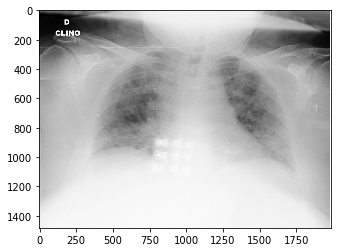

[[182 169 152 ... 254 254 254]
 [165 150 138 ... 254 254 254]
 [146 134 128 ... 254 254 254]
 ...
 [243 244 245 ... 254 254 254]
 [245 245 245 ... 254 254 254]
 [254 254 254 ... 254 254 254]]
(1482, 1989)


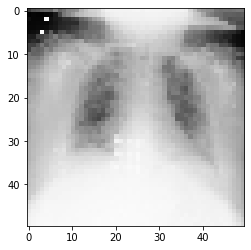

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "C:\covidornocovid"

CATEGORIES = ["covid", "noCovid"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

print(img_array)
print(img_array.shape)

#normalizar al perro
IMG_SIZEY = 50
IMG_SIZEX = 50

new_array = cv2.resize(img_array, (IMG_SIZEX, IMG_SIZEY))
plt.imshow(new_array, cmap='gray')
plt.show()


In [2]:
training_data = []

def create_training_data():
    for category in CATEGORIES: 

        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)

        for img in tqdm(os.listdir(path)): 
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE) 
                new_array = cv2.resize(img_array, (IMG_SIZEX, IMG_SIZEY))  
                training_data.append([new_array, class_num]) 
            except Exception as e: 
                pass

create_training_data()

100%|██████████| 196/196 [00:04<00:00, 44.14it/s]


In [4]:
print(len(training_data))

import random
random.shuffle(training_data)

X = []
Y = []

for features,label in training_data:
    X.append(features)
    Y.append(label)

X = np.array(X).reshape(-1, IMG_SIZEX, IMG_SIZEY,1)

284


In [5]:
#mezcla de los training data set
for sample in training_data[:10]:
    print(sample[1])

#guardar los valores
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("Y.pickle","wb")
pickle.dump(Y, pickle_out)
pickle_out.close()

1
1
1
0
1
1
1
1
1
0


In [6]:
print(X.shape)

(284, 50, 50, 1)
